<a href="https://colab.research.google.com/github/Vicente836/Practica-Ihealth/blob/S1/ED_cuts_3_3d_to_slice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

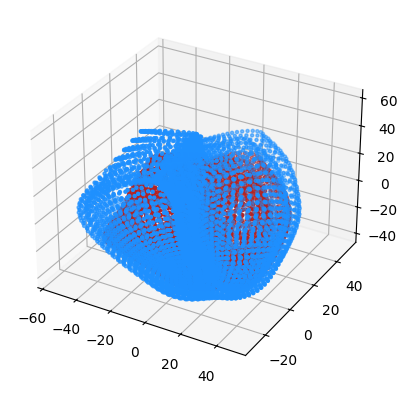

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import h5py as h5
import numpy as np

# read H5 file
pc = h5.File('UKBRVLV.h5', 'r')

# note that H5PY matrices in python are transposed

# generate the first principal mode
# with 1.5 times the standard deviation
S = np.transpose(pc['MU']) + (1.5 * np.sqrt(pc['LATENT'][0,0]) * pc['COEFF'][0,:])

# get ED & ES points, & convert to 3 columns matrix [x, y, z]
N = S.shape[1] // 2
ed = np.reshape(S[0,:N], (-1,3))
es = np.reshape(S[0,N:], (-1,3))

# plot ED points in blue
# plot ES points in red
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(ed[:,0], ed[:,1], ed[:,2], color='dodgerblue', marker='.')
ax.scatter(es[:,0], es[:,1], es[:,2], color='firebrick', marker='.')

In [ ]:
print('Intervalo en el eje x: [{}, {}]'.format( str(max(ed[:,0])) , str(min(ed[:,0]))) )
print('Intervalo en el eje y: [{}, {}]'.format( str(max(ed[:,1])) , str(min(ed[:,1]))) )
print('Intervalo en el eje z: [{}, {}]'.format( str(max(ed[:,2])) , str(min(ed[:,2]))) )
print('Rango en el eje y: ' + str(max(ed[:,1]) - min(ed[:,0])))
print('Rango en el eje y: ' + str(max(ed[:,1]) - min(ed[:,1])))
print('Rango en el eje z: ' + str(max(ed[:,2]) - min(ed[:,2])))

Intervalo en el eje x: [48.26416085393821, -55.26058550239644]
Intervalo en el eje y: [51.21593701991488, -29.54433027871962]
Intervalo en el eje z: [58.74339563274924, -39.764358214928464]
Rango en el eje y: 106.47652252231131
Rango en el eje y: 80.7602672986345
Rango en el eje z: 98.5077538476777


In [ ]:
!apt-get install -qq xvfb libgl1-mesa-glx
!pip install pyvista -qq

In [ ]:
import pyvista as pv
pyvista.set_jupyter_backend('static')
pyvista.global_theme.notebook = True
pyvista.start_xvfb()

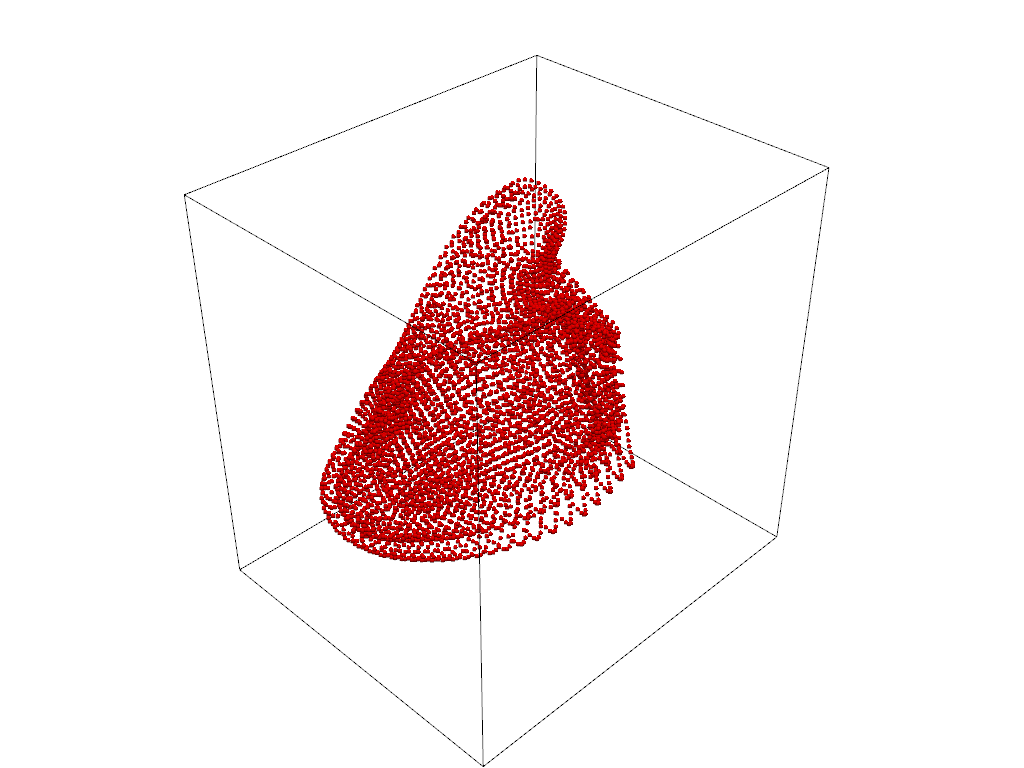

In [ ]:
heart_poly = pv.PolyData(ed)
#heart_poly.plot(color='dodgerblue')
heart_poly["val"] = np.ones_like(ed[:,0])

x = np.linspace(-60, 60, 200)
y = np.linspace(-40, 60, 200)
z = np.linspace(-50, 70, 200)
grid = pv.StructuredGrid(*np.meshgrid(x, y, z, indexing="ij"))

p = pv.Plotter()
p.add_mesh(heart_poly, render_points_as_spheres=True, color = 'red')
p.add_mesh(grid.outline(), color='k')
p.show()

In [ ]:
interp = grid.interpolate(heart_poly, radius=2)

In [ ]:
!pip install meshio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.2/166.2 kB 3.1 MB/s eta 0:00:00


In [ ]:
pv.save_meshio("heart_interp.vtk", interp)

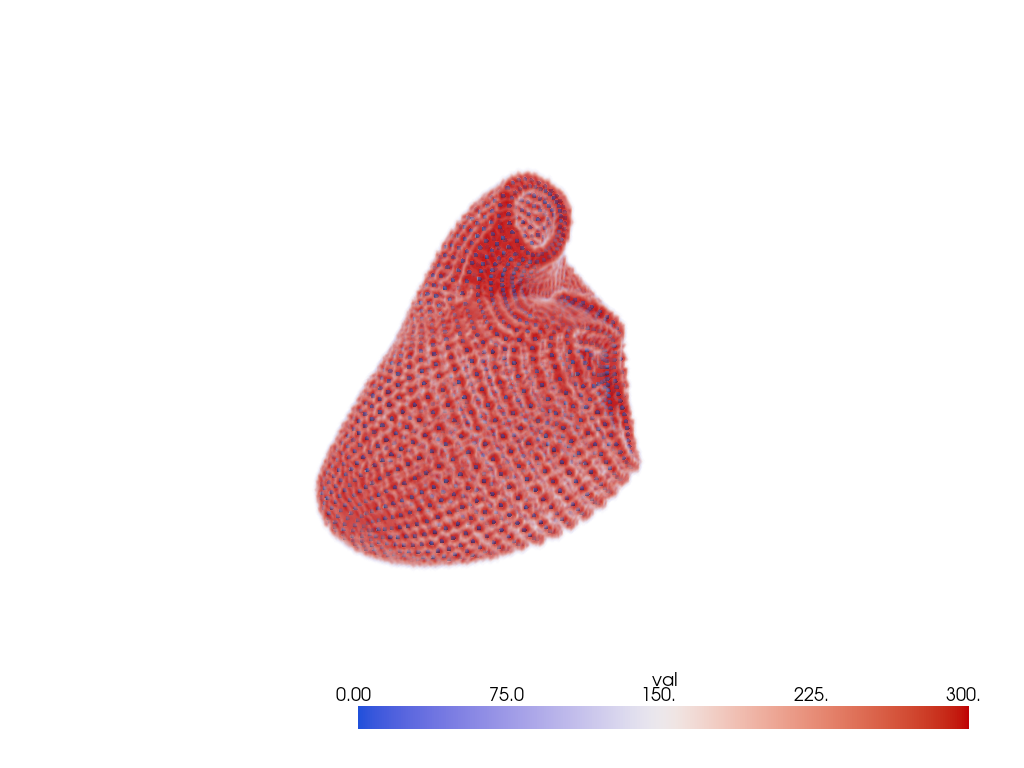

In [ ]:
dargs = dict(cmap="coolwarm", clim=[0, 300], scalars="val")
cpos = [
    (364280.5723737897, 4285326.164400684, 14093.431895014139),
    (337748.7217949739, 4261154.45054595, -637.1092549935128),
    (-0.29629216102673206, -0.23840196609932093, 0.9248651025279784),
]
vol_opac = [0, 0, 0.2, 0.2, 0.5, 0.5]

p = pv.Plotter()
p.add_volume(interp, **dargs, opacity=vol_opac)
p.add_mesh(heart_poly, render_points_as_spheres=True, point_size=5, **dargs)
#p.subplot(0, 1)
#p.add_mesh(interp.contour(5), opacity=0.5,)
#p.add_mesh(heart_poly, render_points_as_spheres=True, point_size=10,)
#p.link_views()
p.show()

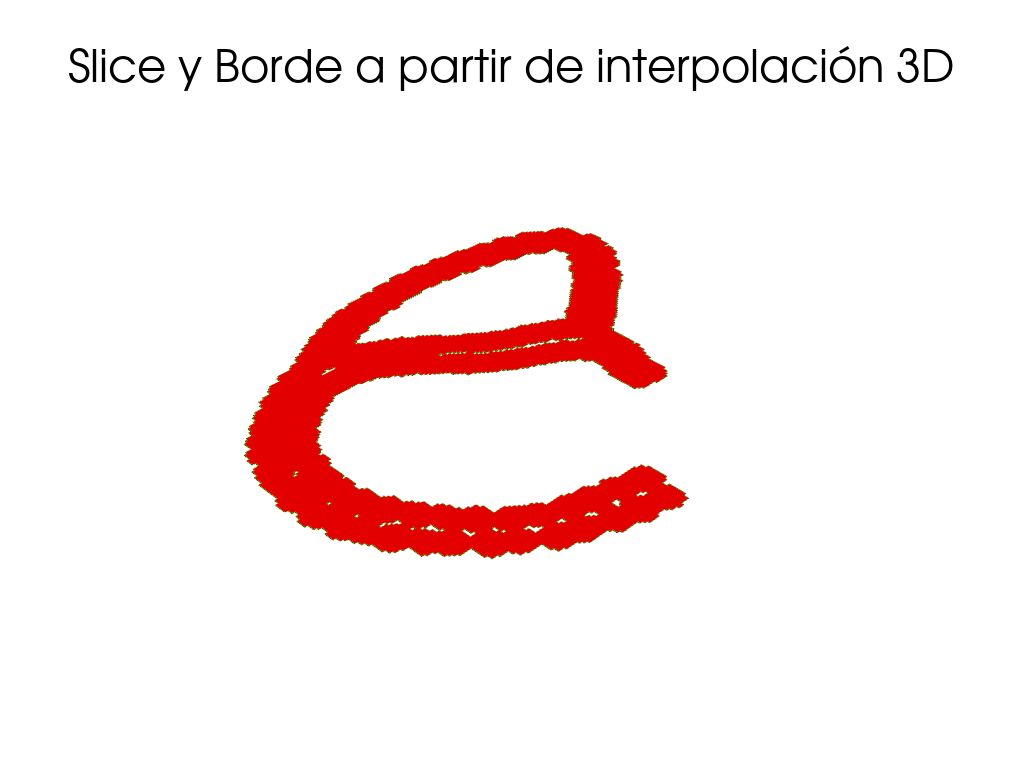

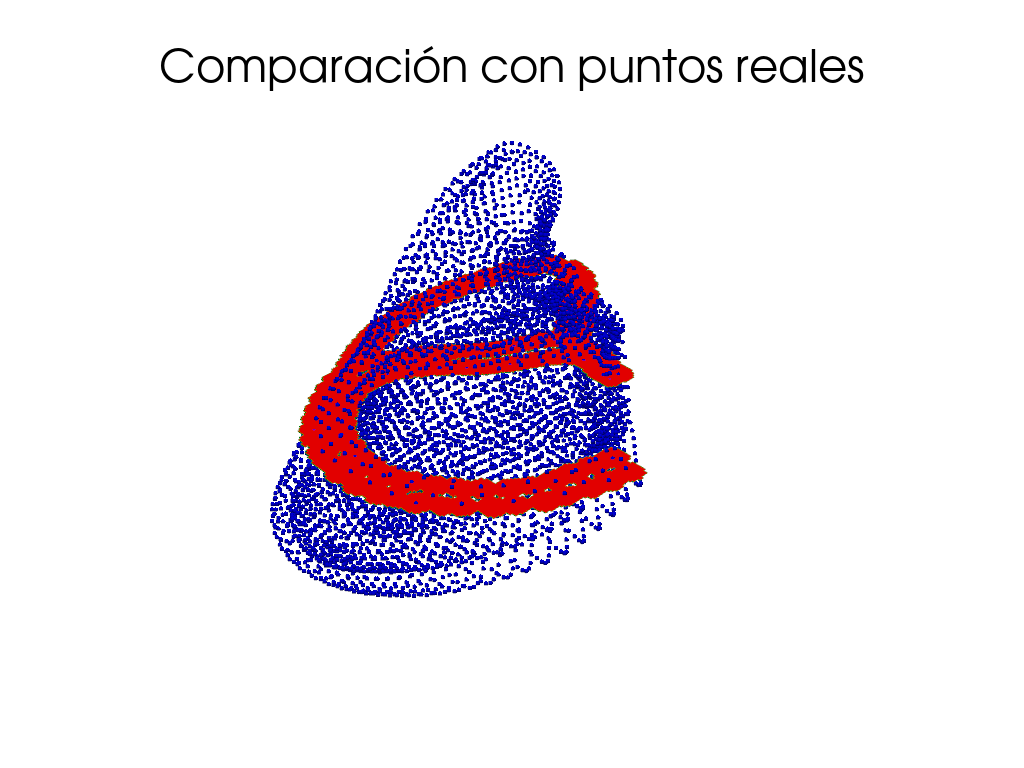

In [ ]:
interp = grid.interpolate(heart_poly, radius=3, sharpness=0.05)
h=10
single_slice = interp.slice(normal=[0, 0, 1], origin = [0,0,h])
thresh = single_slice.threshold(value=0.9)
thresh["val"] = np.ones_like(thresh["val"])
#thresh.plot(show_edges=True, color='red')
boundary = thresh.extract_feature_edges(non_manifold_edges = False, feature_edges = False, manifold_edges = False)
#boundary.plot()
p = pv.Plotter()
p.add_mesh(thresh, color='red')
p.add_mesh(boundary, color='green', render_points_as_spheres=True, point_size=10)
p.add_title("Slice y Borde a partir de interpolación 3D")
p.show()
p = pv.Plotter()
p.add_title("Comparación con puntos reales")
p.add_mesh(heart_poly, render_points_as_spheres=True, color = 'blue')
p.add_mesh(thresh, color='red')
p.add_mesh(boundary, color='green', render_points_as_spheres=True, point_size=10)
p.show()
